# Experiment 4

Compare the impacts of endogenising land-use change to each policy.

- Policies: 11 original Waas policies
- Climate change scenarios: Yes
- Socioeconomic scenarios: Yes

In [1]:
from ema_workbench import load_results
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

results = load_results('S05_24022018_v171.tar.gz')
experiments, outcomes = results

#experiments df
experiments_df = pd.DataFrame(experiments)
experiments_df['integrator'] = experiments_df.index

C:\Users\bjafino\anaconda3\envs\py27\lib\site-packages\ema_workbench\em_framework\optimization.py:22: ImportWarning: platypus based optimization not available
  warnings.warn("platypus based optimization not available", ImportWarning)


In [2]:
all_outcomes = outcomes.copy()

'''
Outcomes for no interaction simulation runs
'''
outcomes0 = {k: all_outcomes.get(k, None) for k in ('ATP_0', 'DRFlooded_0', 'StadFldA_0', 'DamAgriKSum_0', 'DamCumFloat_0',\
                                                    'agriSuit_0', 'greeSuit_0', 'natuSuit_0', 'recrSuit_0', 'resiSuit_0',\
                                                    'workSuit_0')}
outcomes0_df = pd.DataFrame.from_dict(outcomes0)
outcomes0_df['States'] = 'no_interaction'
outcomes0_df.columns = [colname[:-1] for colname in outcomes0_df.columns]
outcomes0_df['integrator'] = outcomes0_df.index
outcomes0_df = pd.merge(outcomes0_df, experiments_df, on='integrator')

'''
Outcomes for simulation runs with interactions
'''
outcomesi = {k: all_outcomes.get(k, None) for k in ('ATP_i', 'DRFlooded_i', 'StadFldA_i', 'DamAgriKSum_i', 'DamCumFloat_i',\
                                                    'agriSuit_i', 'greeSuit_i', 'natuSuit_i', 'recrSuit_i', 'resiSuit_i',\
                                                    'workSuit_i')}
outcomesi_df = pd.DataFrame.from_dict(outcomesi)
outcomesi_df['States'] = 'interaction'
outcomesi_df.columns = [colname[:-1] for colname in outcomesi_df.columns]
outcomesi_df['integrator'] = outcomesi_df.index
outcomesi_df = pd.merge(outcomesi_df, experiments_df, on='integrator')

'''
merging the outcomes
'''
outcomes_df = pd.concat([outcomes0_df, outcomesi_df], join='outer')

In [3]:
#take only the three relevant socioeconomic scenarios: no change, deurbanization, urbanization
outcomes_df = outcomes_df.loc[outcomes_df['claimScenario'].isin([0,1,5])]

C:\Users\bjafino\anaconda3\envs\py27\lib\site-packages\seaborn\categorical.py:490: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  box_data = remove_na(group_data[hue_mask])


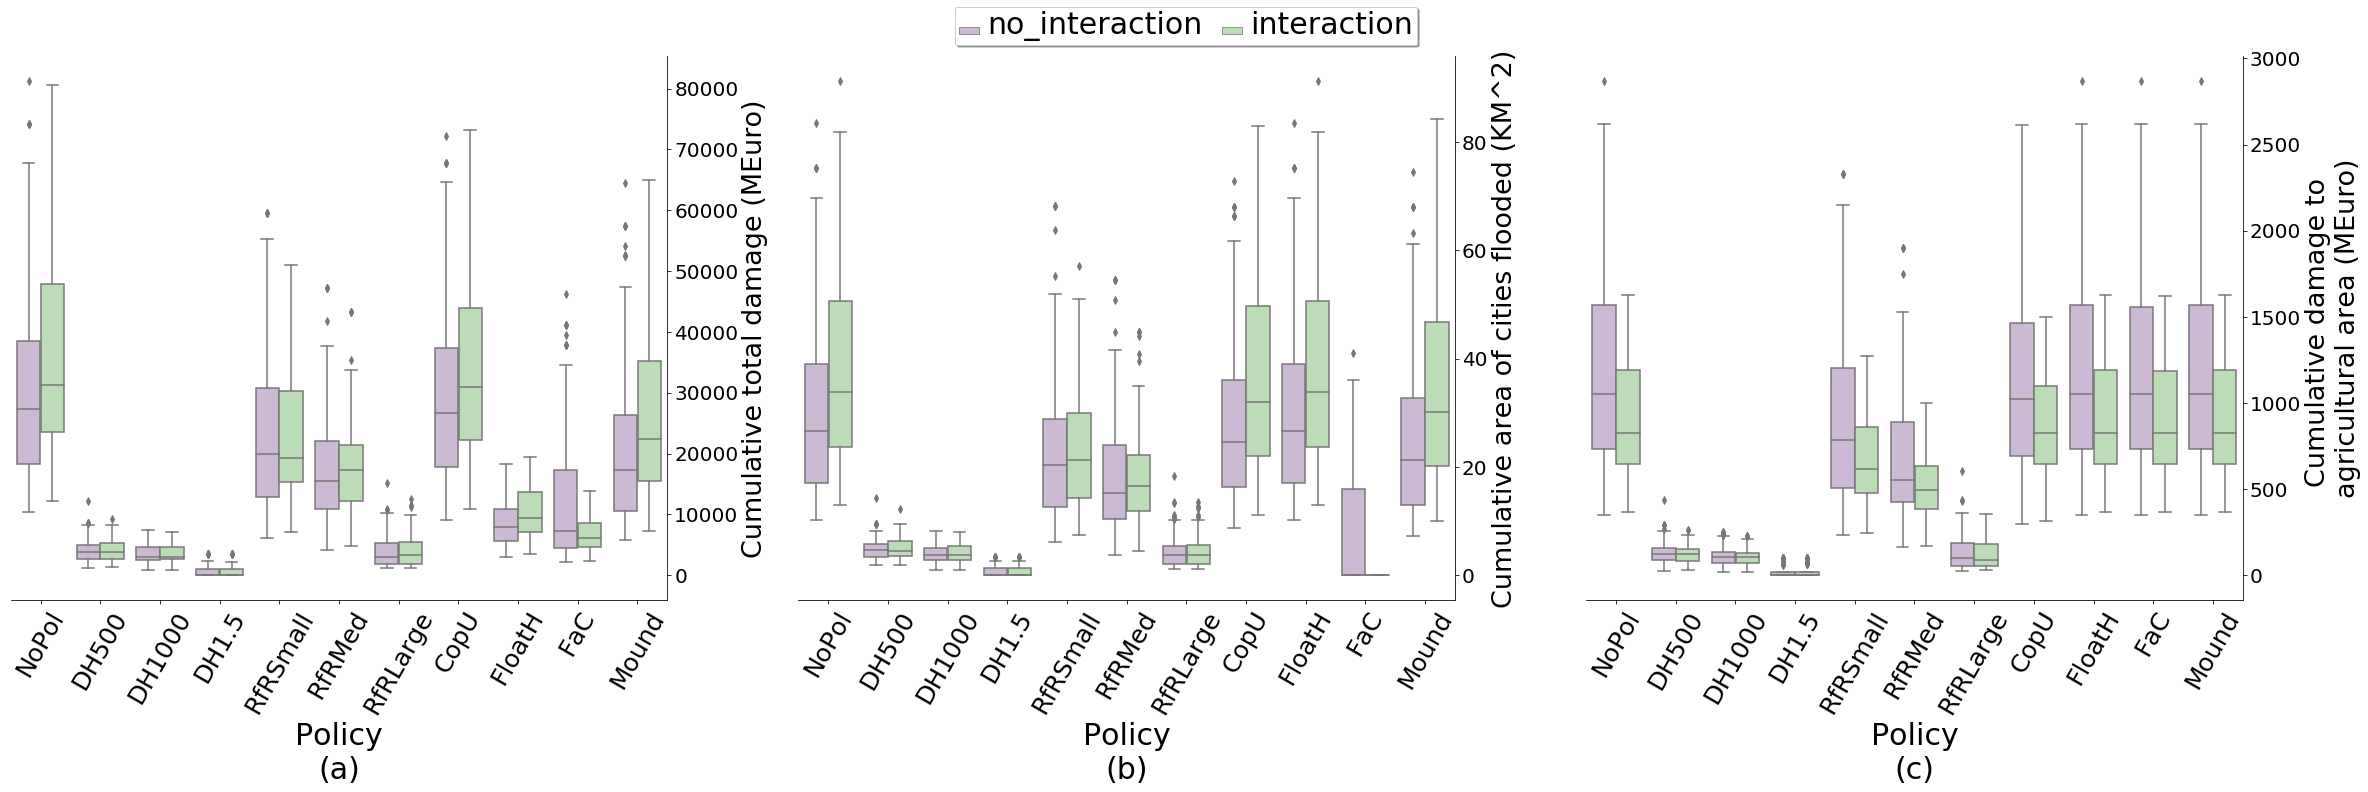

In [4]:
f, axarr = plt.subplots(1,3, figsize=(40,10))

bp0  = sns.boxplot(x="policy", y="StadFldA_", data=outcomes_df, hue="State", ax=axarr[1], palette="PRGn")
bp0.set_xlabel('Policy\n(b)').set_fontsize(30)
bp0.set_ylabel("Cumulative area of cities flooded (KM^2)",fontsize=27)
bp0  = sns.despine()

bp1 = sns.boxplot(x="policy", y="DamAgriKSum_", data=outcomes_df, hue="State", ax=axarr[2], palette="PRGn")
bp1.set_xlabel('Policy\n(c)').set_fontsize(30)
bp1.set_ylabel("Cumulative damage to \nagricultural area (MEuro)",fontsize=27)
bp1 = sns.despine()

bp2 = sns.boxplot(x="policy", y="DamCumFloat_", data=outcomes_df, hue="State", ax=axarr[0], palette="PRGn")
bp2.set_xlabel('Policy\n(a)').set_fontsize(30)
bp2.set_ylabel("Cumulative total damage (MEuro)",fontsize=27)
bp2 = sns.despine()

f.subplots_adjust(hspace=10)

for x in range(3):
        axarr[x].yaxis.tick_right()
        axarr[x].yaxis.set_label_position("right")
        axarr[x].spines['left'].set_visible(False)
        axarr[x].spines['right'].set_visible(True)
        axarr[x].xaxis.set_tick_params(labelsize=25, rotation=60)
        axarr[x].legend_.remove()
        axarr[x].yaxis.set_tick_params(labelsize=20)
        if x==2:
            axarr[x].legend(ncol=2, bbox_to_anchor=(-0.25,1.1), fancybox=True, shadow=True)
            plt.setp(axarr[x].get_legend().get_texts(), fontsize='30') # for legend text

plt.subplots_adjust(hspace = 0.2)

plt.show()